In [1]:
# set auto_reload

%load_ext autoreload
%autoreload 2

In [2]:
from skimage import io, filters, feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2, hed
from skimage.filters import meijering, sato, frangi, hessian
import caer



## Interactive animation of edge detector against different color spaces for thin section and geological images 

In [3]:

import ipywidgets as wd

def colorSpaces(img):
    rgb = caer.imread(img, rgb=True)
    hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)
    lab = cv2.cvtColor(rgb,cv2.COLOR_RGB2LAB)
    hsl = cv2.cvtColor(rgb,cv2.COLOR_RGB2HLS)
    YBR = cv2.cvtColor(rgb,cv2.COLOR_RGB2YCR_CB)
    return rgb,hsv,lab,hsl,YBR

def edges(img):
    canny = cv2.Canny(img,100,200)
    return canny

@wd.interact(A=(0,4,1), cannyEdges=False, img=[('olivino', "olivino.jpg"), ('estilolitos', "estilolito.jpg"),\
                                          ("olivino serpentinizado","olivino_serpentina.jpg")])

def actualice(A=1, cannyEdges=False,img="olivino.jpg"):
    plt.figure(figsize=(12,9))
    colors = ["RGB", "HSV", "LAB", "HSL", "YBR"]
    if cannyEdges:
        plt.title(f"Bordes Canny Modelo Color: {colors[A]}")
        return plt.imshow(edges(colorSpaces(img)[A]))
    else:
        plt.title(f"Sección {img} Modelo Color: {colors[A]}")
        return plt.imshow(colorSpaces(img)[A])

interactive(children=(IntSlider(value=1, description='A', max=4), Checkbox(value=False, description='cannyEdge…

## Testing HED filter with different color spaces (Session error of hed algorithm on second run of cell calling it, please restart nb and kernel)

In [4]:
import hed
rgb,hsv,lab,hsl,YBR = colorSpaces("olivino.jpg")

hedrgb = hed.hed(rgb)



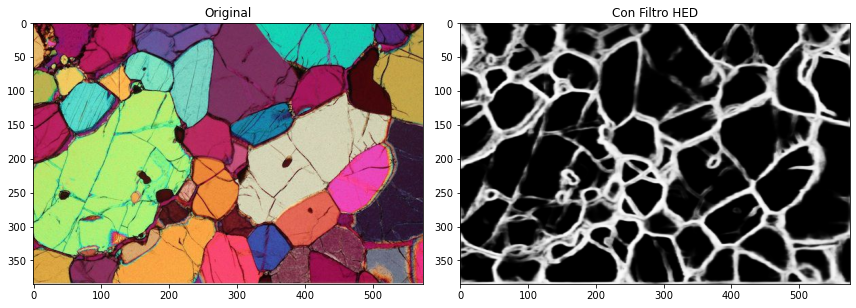

In [5]:

hed.graphImgs([rgb, hedrgb], ["Original", "Con Filtro HED"])

## Experimenting with ridge detectors

<ipython-input-6-c52b37164788>:1: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  hed.graphImgs([rgb, hedrgb, sato(hedrgb), meijering(hedrgb)], ["Original", "Filtro HED", "Ridge Sato", "Ridge Meijering"])


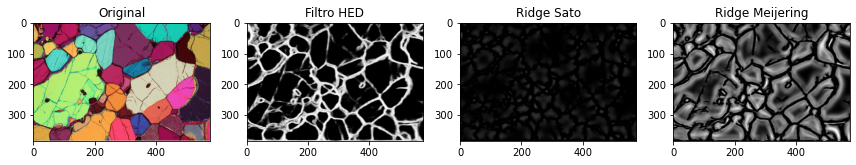

In [6]:
hed.graphImgs([rgb, hedrgb, sato(hedrgb), meijering(hedrgb)], ["Original", "Filtro HED", "Ridge Sato", "Ridge Meijering"])

## HED Filter + Meijering Ridge Detector looks promising

Text(0.5, 1.0, 'Detail Meijering Ridge Detector after HED filter')

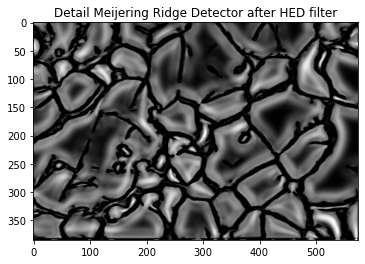

In [7]:
plt.imshow(meijering(hedrgb))
plt.title("Detail Meijering Ridge Detector after HED filter")

<ipython-input-11-3d42cf9b967b>:2: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  hed.graphImgs([img_canny,hessian(img_canny)], ["Canny on img","Canny and Meijering Ridge Detector"])


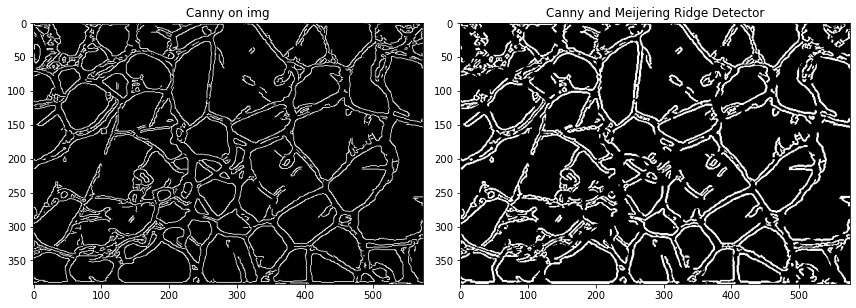

In [11]:
img_canny = hed.apply_canny(hedrgb)
hed.graphImgs([img_canny,hessian(img_canny)], ["Canny on img","Canny and Hessian Ridge Detector"])

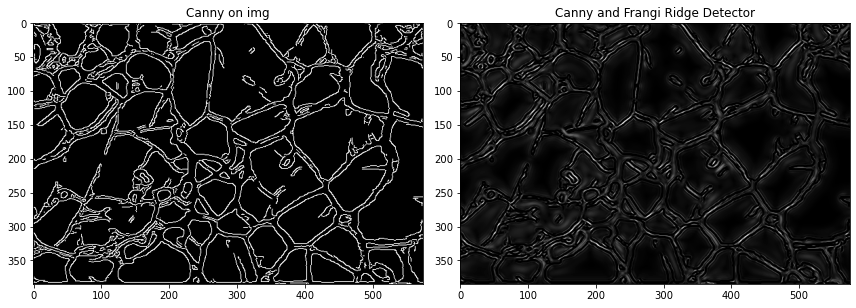

In [12]:
img_canny = hed.apply_canny(hedrgb)
hed.graphImgs([img_canny,frangi(img_canny)], ["Canny on img","Canny and Frangi Ridge Detector"])

<ipython-input-4-6edae7314dc2>:6: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  hed.graphImgs([rgb, hedrgb, sato(hedrgb), meijering(hedrgb)], ["Troctolite RGB","Troctolite HED", "Troctolite HED + Sato", "Troctolite HED + Meijering"])


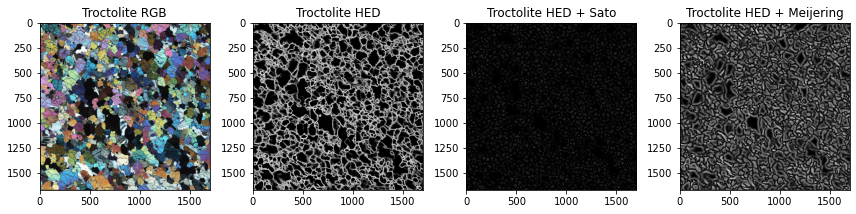

In [4]:
import hed
rgb,hsv,lab,hsl,YBR = colorSpaces("troctolita.jpg")

hedrgb = hed.hed(rgb)

hed.graphImgs([rgb, hedrgb, sato(hedrgb), meijering(hedrgb)], ["Troctolite RGB","Troctolite HED", "Troctolite HED + Sato", "Troctolite HED + Meijering"])

In [8]:
hedMeijering = meijering(hedrgb)

Text(0.5, 1.0, 'Detail Meijering Ridge Detector after HED filter')

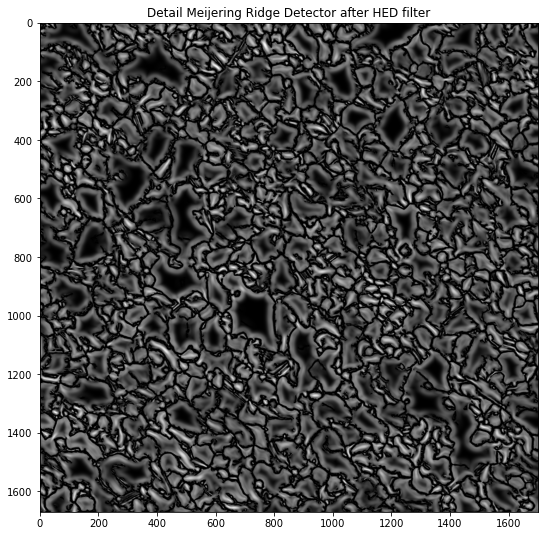

In [9]:
plt.subplots(figsize=(12, 9))
plt.imshow(hedMeijering)
plt.title("Detail Meijering Ridge Detector after HED filter")

In [45]:
from skimage.filters import threshold_otsu


mini = threshold_otsu(hedMeijering)


th, im_th = cv2.threshold(hedMeijering, mini, 255, cv2.THRESH_BINARY)



<ipython-input-45-ab6189d3214b>:4: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1670, 1701, 3) looks like an RGB image
  mini = threshold_otsu(hedMeijering)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


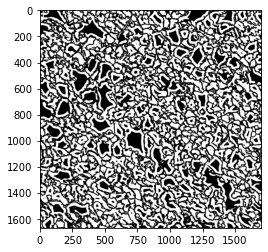

In [46]:
plt.imshow(im_th)

In [9]:
#TODO solve problem wiht kernel day with subsequent HED iterations

C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  """Entry point for launching an IPython kernel.


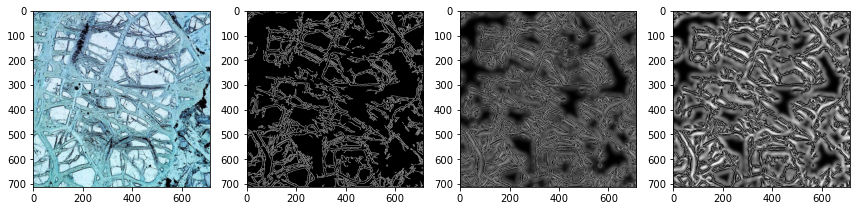

In [10]:
hed.graphImgs([image, imgCanny, sato(imgCanny), meijering(imgCanny)])

C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  


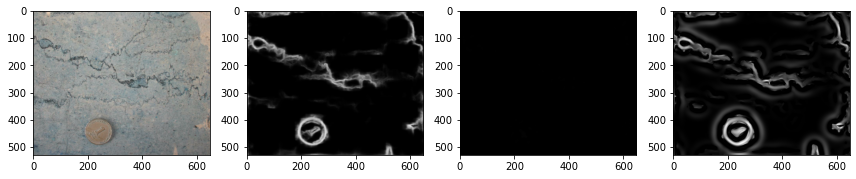

In [1]:
import hed, cv2
from skimage.filters import meijering, sato, frangi, hessian
from winsound import Beep
fq = 1500  # Set Frequency To 2500 Hertz
du = 600  # Set Duration To 1000 ms == 1 second
Beep(fq, du)
image = cv2.imread("estilolito.jpg", 1)
imageHED = hed.hed(image)
Beep(fq, du)
imageSato = sato(imageHED)
Beep(fq, du)
imageMeijering = meijering(imageHED)
Beep(fq, du)
hed.graphImgs([image, imageHED, sato(imageSato), meijering(imageMeijering)])
Beep(2000, du)

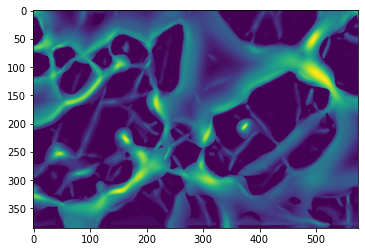

In [22]:
plt.imshow(meijering(cv2.imread("olivino.jpg", 0), sigmas=range(4,20,1)))

In [23]:
imagen = cv2.imread("olivino.jpg", 1)


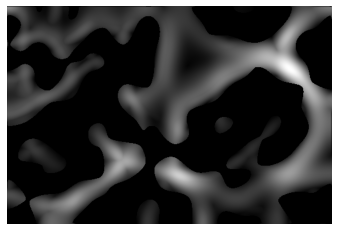

In [36]:
from celluloid import Camera
fig = plt.figure()
camera = Camera(fig)


for i in reversed(range(5,20,1)):
    if i == 1:
        plt.imshow(imagen[:,:,:])
        plt.axis("off")
        camera.snap()        
        plt.imshow(imagen[:,:,0])
        plt.axis("off")
        camera.snap()
    plt.imshow(meijering(imagen, sigmas=range(i-4,i,1)), cmap="rainbow")
    plt.axis("off")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)
for i in range(5,20,1):
    plt.imshow(meijering(imagen, sigmas=range(i,i+4,1)), cmap="rainbow")
    plt.axis("off")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)

animation = camera.animate()
animation.save("animaoli.gif")

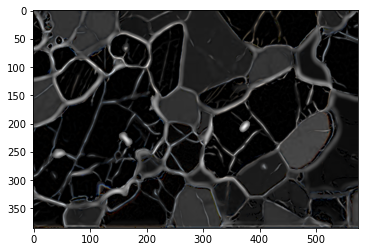

In [35]:
plt.imshow(meijering(imagen, sigmas=(1,5,2)))

In [25]:
from IPython.display import HTML
animation = camera.animate()
HTML(animation.to_html5_video())

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for i in reversed(range(5,20,1)):
    if i == 1:
        plt.imshow(imagen[:,:,0],cmap="rainbow")
        camera.snap()
    plt.imshow(meijering(imagen, sigmas=range(i-4,i,1)), cmap="rainbow")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)
for i in range(5,20,1):

    plt.imshow(meijering(imagen, sigmas=range(i,i+4,1)), cmap="rainbow")
    camera.snap()
    Beep(fq, du)
Beep(fq-1000,du+200)

animation = camera.animate()
animation.save("anima2.mp4")
